## Data Pre-Processing Exploration and  Visualization
   It takes about 5 times more effort in collating data campared to the effort in modelling it. Even after you have collected the data, we are not quite yet ready to train the model. Real world datasets are messy. There are missing data. Some data might need additional mapping. We might have to convert some column. These actions constituite the pre-processing step. 
   
   Datasets have to be loded in to the memory before we can start analyzing it. Lerger the datset larger is the memory required. Strings and Python objects take more space compared to floats and integers. There is an effecient representation for the dataset by choosing appropriate column datatypes. Our pre-processing operations are an attempt to make the data more effecient.
   
---
    
   In this notebook we will work on Housing dataset, downloaded from the internet. We will first preprocess the data and reduce its size by 90%. We will then explore the dataset using seaborn vizualization library.
        
   First lets load up all the libraries that we will use. Apart from seaborn we will be using Matplotlib. Seaborn is built upon the Matplotlib and is primarily used for plotting dataframes. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_datareader as web
import matplotlib.pyplot as plt

In [2]:
sns.set(style='darkgrid')
pd.options.display.max_columns = 300
pd.options.display.max_rows = 100
plt.style.use('fivethirtyeight')
%matplotlib inline

## AmesHousing Dataset
The AmesHousing dataset contains housing data for the city of [Ames, Iowa](https://en.wikipedia.org/wiki/Ames,_Iowa). Along with the residential real estate prices (for close to 3000 properties) it contains 81 other descriptive columns. The number of bedroom, the total area, balconies and so on. This dataset has been around since 2011 and has been used for introductory machine learning. You can find more information in the [metadata](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

Let us start by loading the dataset. 

In [3]:
prices = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',sep='\t')

As you can see loading data is a single line command. It fetches a csv (Comma Separated Value [.csv] file. CSV predated the excel spreadsheets. Its essentially a text file where each value was is separated by a comma and each row by a new line "\n"). This csv file is  hosted online at amstat.org. We can customize the read_csv() method to tell pandas how to process the file into a DataFrame. How many rows to read, should we keep the header rows as column labels, how to handle missing data. We are keeping things simple here and giving it the file source and indicating that the separator is '\t' 

We can customize the `read_csv()` method to tell pandas how to process the file into a DataFrame. How many rows to read, should we keep the header rows as column labels, how to handle missing data. We are keeping things simple here and giving it the file source and indicating that the separator is '\t' (tab).

Lets see how the Datatypes look

In [4]:
prices.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


`head()` lists down the first 5 rows of data in a neatly arranged table. If you keep scrolling to the left you will find all the 81 columns of this long table. The table starts with the index 0-4 on the left. The column labels are added on the top header for the table. Each cell bears the respective value. If you call `head(10)` it will show the first 10 rows instead of 5.

This table gives us a sense of the dataset. I allows us to familiarize with the data columns. We can infer which columns represent a categorical data whicle which are continous. We can also find out which columns are for dates. PID for instance apprears to be a unique case ID. MS SubClass looks like a categorical data. 
#### Datatypes in Pandas
Pandas has autoallocated the data to different datatypes. Lets find out how it has done by listing out the first 10 columns

In [5]:
prices.dtypes[-10:]

Pool Area          int64
Pool QC           object
Fence             object
Misc Feature      object
Misc Val           int64
Mo Sold            int64
Yr Sold            int64
Sale Type         object
Sale Condition    object
SalePrice          int64
dtype: object

The command `prices.dtypes` lists down all the columns and the associated datatypes. There is a mix of int / float and some `python objects` are present as well. Pandas `read_csv` has automatically parsed the data and allocated the columns to the best matched datatype. 

However, it has its limitations. We have to manually analyze the dataset to ensure it has been optimized for our computations. The Ames housing dataset has about 3000 records. Production datasets can have over a million records. Prepearing the raw data, also known as **pre-processing** is a large part of the workflow in any analytics job. 

Some columns appear to be mismatched.  Whenever you see python `object` or `strings` in the tabular data you should sense something amiss . For instance `Sale condition`  should be a categorical.

We can investigate by finding the distribution of unique values within the dataframe by calling the `value_counts` method.

In [6]:
prices['Bsmt Half Bath'].value_counts()

0.0    2753
1.0     171
2.0       4
Name: Bsmt Half Bath, dtype: int64

`Sale Condition` has six categories Normal Partial and so on. Pandas lacking better judgement has encoded "Sale Condition" as string. There are other such objects which have been set as `objects` instead of categorical  datatype. 

#### Optimizing Columns

We can convert the `Sale Condition` column into `categorical` using `astype()` method in pandas. `.astype()` takes in a dictionary: column names as the keys and and the respective datatype as the value. We can use `integer` `bool` `category` `str` as primitive datatypes. 

In [7]:
(prices
    .astype({'Sale Condition': 'category'})
    ['Sale Condition'].dtypes
)

CategoricalDtype(categories=['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal',
                  'Partial'],
, ordered=False)

Some  mislabelled can hide as numbers. Some categorical columns can be numerical. We can find them by filtering out numerical columns and then determining the unique values in each of those columns. This dataset has about 3000 rows. If the unique values in a column is below 10, it is likely that the said column is categorical

`select_dtypes()` filters out the column labels based on the datatype we specify. Passing `['integer','float']` selects columns having numbers.   The function`nunique` then lists out the number of unique values. We sort out the resies to get

In [8]:
(prices
    .select_dtypes(['integer', 'float'])
    .nunique()
    .sort_values()
    [:16]
)

Bsmt Half Bath     3
Half Bath          3
Bsmt Full Bath     4
Kitchen AbvGr      4
Fireplaces         5
Full Bath          5
Yr Sold            5
Garage Cars        6
Bedroom AbvGr      8
Overall Cond       9
Overall Qual      10
Mo Sold           12
Pool Area         14
TotRms AbvGrd     14
MS SubClass       16
3Ssn Porch        31
dtype: int64

Bathrooms, Fireplaces, Year Sold are continous integeres, but have a small range of values. For instance this dataset has houses sold between 2006-10. The `Yr_Sold` has 5 unique values. We can leave these classed as numerical. If we want to reduce the size we can convert them into small integers `np.int8` using the function `astype()`
```python
(prices
    .astype({'Half Bath': np.int8})
)
```
np.int8 stores variables as a 8 bit integer. It can store values from -512 to +512. Its adequate for integres having a small range as number of bathrooms and fireplaces.
>#### Pandas Chaining
>Notice that we have chained Pandas methods in the expression above. It reads like a sequence of instructions which can easily be modified, commented, or even appended to. Throughout this notebook we will use the chained expression convention. For chaining pandas methods we wrap the code within round brackets.
>```python
(df
    .method1()
     #.method2() # This method has been commented out
    .....
    .methodn()
)
>```

We have checked for and corrected categorical data. Sometimes a binary (as in True / False) data might sit behind a categorical label. For instance take the column `Bsmt Half Bath`. It has three values 0, 1, 2. However there are only 4 instances with 2 `Bsmt Half Bath`. Instead of a categorical / integer `Bsmt Half Bath` we can assign it as a binary. 

We had used a function `.value_counts()`. It listed each unique value and the number of instance having a given value. Pandas has a similar plot function `.hist()` for displaying the same information in a graph. It plots the histogram for the dataset. Each bar in the histogram represents the frequency of occurance at a given range. The span (min - max) for the data is plotted on the x axis. this span is brooken down into bins. At each bin we count the number of occurances. The Y axis represents the frequency of occurance. 

We will take the list of columns from the previous cell `suspect_columns`. We will then plot the histogram for the values in these columns.

array([[<AxesSubplot:title={'center':'BsmtFin SF 1'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 2'}>,
        <AxesSubplot:title={'center':'Low Qual Fin SF'}>],
       [<AxesSubplot:title={'center':'Bsmt Full Bath'}>,
        <AxesSubplot:title={'center':'Bsmt Half Bath'}>,
        <AxesSubplot:title={'center':'Full Bath'}>],
       [<AxesSubplot:title={'center':'Bedroom AbvGr'}>,
        <AxesSubplot:title={'center':'Kitchen AbvGr'}>,
        <AxesSubplot:title={'center':'TotRms AbvGrd'}>],
       [<AxesSubplot:title={'center':'3Ssn Porch'}>,
        <AxesSubplot:title={'center':'Screen Porch'}>,
        <AxesSubplot:title={'center':'Misc Val'}>]], dtype=object)

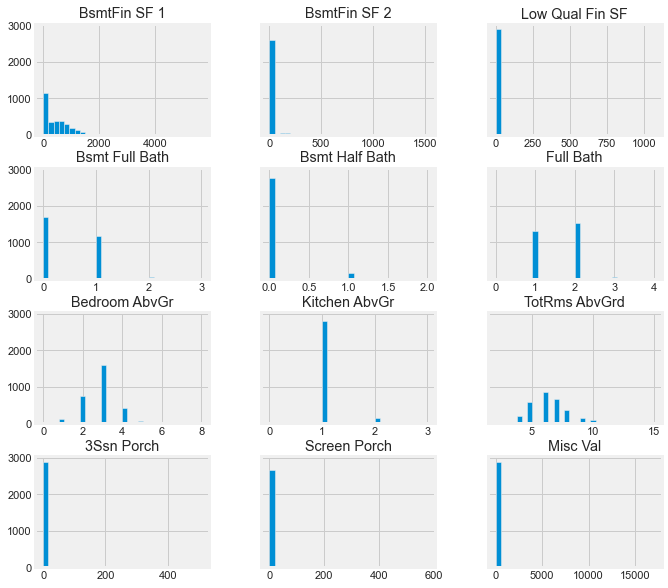

In [9]:
suspect_columns =['BsmtFin SF 1', 'BsmtFin SF 2','Low Qual Fin SF',
                     'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath',
                     'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
                     '3Ssn Porch', 'Screen Porch', 'Misc Val']
(prices
     .filter(items =suspect_columns )
     #.select_dtypes('int')
     #.value_counts()
    .hist(figsize=(10, 10), sharey=True, bins = 30)
    #.columns
)

The `hist()` method displays a figure with 12 subplots (4 rows x 3 columns). Each subplot is a histogram for a specific column displayed in the title. The 1st (top left) subplot refers to `BsmtFin SF 1`. It shows a sharp peak at x=0. The distribution shows a gradual increase followed by a decrease to zero. The other graphs show discrete distributons. Some of them suggest they might have categorical values.

Before calling the hist method we had filtered out the prices dataframe using `suspect_columns`. To facilitate comparision we have fixed the y axis `sharey=True` across all the subplots. The Y-axis ranges between 0 -3000 for all the subplots.

We had passed 30 bins within the `hist` method. This partitions the data range (the x-axis) of a given column into 30 intervals. For example *Basement Finished Surface Area* `BsmntFin SF 1` (top - left) has a range 0-4000 sft. It has been partitioned into 30 intervals. Others such as `3Ssn Porch` (bottom - left) shows a distorted distribution. One value dominates the entire range. We can check a given column easily by calling out the `.describe()` method:

In [10]:
prices['3Ssn Porch'].describe()

count    2930.000000
mean        2.592491
std        25.141331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3Ssn Porch, dtype: float64

`3Ssn Porch` *(Area of Porch receiving Sunlight for 3 seasons)* has 31 unique values. But, majority (>95%) of it is 0. We can reclassify this as a binary column. It is `True` if the the house has a *3 season Porch*.
Similarly based on the histogram plot we can descide to convert the following columns into binary values:
```python
>>binary_columns =['BsmtFin_SF_2','Low_Qual_Fin_SF','Bsmt_Full_Bath',
                 'Bsmt_Half_Bath','col_3Ssn_Porch','Screen_Porch']
```
#### Handling Missing Data
Within this dataset not all cells have data within them. Notice when we had called out `.head()`, the column `Alley` had `NaN` values. `NaN` is *Not a Number* in Pandas. Since we have NaN values column Alley has been set as an `object`. 

We can list out all the missing data by calling `isnan()` which returns `True` if the value is missing. We can then sum up this boolean series to obtain the count of missing values. Showing the first 27 entries below:

In [11]:
( prices
     .isnull()
     .sum()
     .sort_values(ascending=False)
     [:27]
)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

In [12]:
null_suspect_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Cond', 'Garage Finish', 'Garage Yr Blt',
       'Garage Qual', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'Mas Vnr Area',
       'Mas Vnr Type', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1',
       'Garage Cars', 'Electrical', 'Total Bsmt SF', 'Bsmt Unf SF',
       'BsmtFin SF 2', 'Garage Area']
prices.filter(items = null_suspect_cols).head()

,Pool QC,Misc Feature,Alley,Fence,Fireplace Qu,Lot Frontage,Garage Cond,Garage Finish,Garage Yr Blt,Garage Qual,Garage Type,Bsmt Exposure,BsmtFin Type 2,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Mas Vnr Area,Mas Vnr Type,Bsmt Full Bath,Bsmt Half Bath,BsmtFin SF 1,Garage Cars,Electrical,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 2,Garage Area
0,NaN,NaN,NaN,NaN,Gd,141.0,TA,Fin,1960.0,TA,Attchd,Gd,Unf,TA,Gd,BLQ,112.0,Stone,1.0,0.0,639.0,2.0,SBrkr,1080.0,441.0,0.0,528.0
1,NaN,NaN,NaN,MnPrv,NaN,80.0,TA,Unf,1961.0,TA,Attchd,No,LwQ,TA,TA,Rec,0.0,None,0.0,0.0,468.0,1.0,SBrkr,882.0,270.0,144.0,730.0
2,NaN,Gar2,NaN,NaN,NaN,81.0,TA,Unf,1958.0,TA,Attchd,No,Unf,TA,TA,ALQ,108.0,BrkFace,0.0,0.0,923.0,1.0,SBrkr,1329.0,406.0,0.0,312.0
3,NaN,NaN,NaN,NaN,TA,93.0,TA,Fin,1968.0,TA,Attchd,No,Unf,TA,TA,ALQ,0.0,None,1.0,0.0,1065.0,2.0,SBrkr,2110.0,1045.0,0.0,522.0
4,NaN,NaN,NaN,MnPrv,TA,74.0,TA,Fin,1997.0,TA,Attchd,No,Unf,Gd,TA,GLQ,0.0,None,0.0,0.0,791.0,2.0,SBrkr,928.0,137.0,0.0,482.0


Each of these columns have been assigned as either `float64` and `object` datatypes. If there are missing values in an integer / float datatype column, it gets been downgraded to float. Since `NaN` is a `float`. Similarly string / categorical columns  are downgraded to object. 

Pandas has a `.fillna()` method which can substituite missing values. What do we substituite? There are options. We can call up an expert and take his advise. It can be someone who has given this dataset. Dont have access to the expert, then look for pattern within the data. Previous row value, mean, mode can be candidates if you have a reason backing you selection. If you are stuck for time and cannot look for patterns you can throw in a constant. For categorical data our constant will be a new category `missing`. For floats the constant will be 0. This is how we can substituite categorical missing data:

In [13]:
(prices
 .filter(items = null_suspect_cols)
 .select_dtypes('object')
 .fillna('missing')
 .head()
)

,Pool QC,Misc Feature,Alley,Fence,Fireplace Qu,Garage Cond,Garage Finish,Garage Qual,Garage Type,Bsmt Exposure,BsmtFin Type 2,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,Mas Vnr Type,Electrical
0,missing,missing,missing,missing,Gd,TA,Fin,TA,Attchd,Gd,Unf,TA,Gd,BLQ,Stone,SBrkr
1,missing,missing,missing,MnPrv,missing,TA,Unf,TA,Attchd,No,LwQ,TA,TA,Rec,None,SBrkr
2,missing,Gar2,missing,missing,missing,TA,Unf,TA,Attchd,No,Unf,TA,TA,ALQ,BrkFace,SBrkr
3,missing,missing,missing,missing,TA,TA,Fin,TA,Attchd,No,Unf,TA,TA,ALQ,None,SBrkr
4,missing,missing,missing,MnPrv,TA,TA,Fin,TA,Attchd,No,Unf,Gd,TA,GLQ,None,SBrkr


#### Renaming Columns  
Pandas has dot methods to access a series within a dataframe. For example
```python
>>prices.Alley
```
Gives us a Pandas Series object containing the data for the column `Alley`. But, some columns have space in them, while others start with numbers. We can not use the dot method in such cases. 
```python
>>prices.Misc Feature
SyntaxError: invalid syntax
>>prices.3Ssn Porch
SyntaxError: invalid syntax
```

This dataset comes from a source which was not optimized for pandas. We do not have to live within this constraint. We should replace the column labels to suit out needs. `.rename()` method can be used to replace the faulty labels.

In [14]:
(prices
 .filter(items = null_suspect_cols)
 .rename(columns=lambda x: x.replace(' ', '_') )
 .columns
)

Index(['Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Fireplace_Qu',
       'Lot_Frontage', 'Garage_Cond', 'Garage_Finish', 'Garage_Yr_Blt',
       'Garage_Qual', 'Garage_Type', 'Bsmt_Exposure', 'BsmtFin_Type_2',
       'Bsmt_Qual', 'Bsmt_Cond', 'BsmtFin_Type_1', 'Mas_Vnr_Area',
       'Mas_Vnr_Type', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'BsmtFin_SF_1',
       'Garage_Cars', 'Electrical', 'Total_Bsmt_SF', 'Bsmt_Unf_SF',
       'BsmtFin_SF_2', 'Garage_Area'],
      dtype='object')

#### Dropping Columns
Some columns within a dataset may not be relevant for our analysis. The prices DataFrame contains PID column. It contains a unique ID for each transaction (row entry) Unfortunately this doesnot contain any new information. Four our purpose we can delete it using the `.drop()` method. We have to specify the `axis =1` sh that it drops the column. `axis = 0` operates on the row index and is the default mode that we override below:

In [15]:
(prices
        .drop('PID', axis =1)
         .head()
)

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### Assigning Derivative Data
This dataset doesnt have price per-square-feet (psft). `psft` is a common metric in the Real Estate industry. We take the sales price and divide it by the built up area of the house. Larger houses have a bigger sales tag and conversely smaller ones have a lower tag. Normalizing sales price allows us to compare units objectively.

Pandas `.assign()` method takes in a column name and a function to compute the values for the column. It is a normal practice to use lambda operators within assign method. We can pass in multiple column labes seperated by a comma. In this instance we are creating `psft` and  a `date` variable combining the Year and Month sold. We will store the date column as a `pandas.datetime`

In [16]:
(prices
 .assign(
     psft = lambda x: x['SalePrice'] / x['Gr Liv Area'],
     date = lambda x: pd.to_datetime(x['Yr Sold'].astype(str) + '-' + x['Mo Sold'].astype(str))
 )
 [['psft', 'date']]
 .head()
)

,psft,date
0,129.830918,2010-05-01
1,117.187500,2010-06-01
2,129.420617,2010-06-01
3,115.639810,2010-04-01
4,116.574586,2010-03-01


#### PreProcess Function
Now we are ready to assemble all the pre-processing steps into a single function. We will carry out the following:
1. **Format Columns** Parse through all the column names and replace faulty labels. We are looping for labels starting with digits or having space within them.
2. **Drop** unnecessary data (PID)
3. **Treat missing data** We have integer columns masked as floats; categorical columns masked as objects. We will fill missing values and convert these columns to an effecient datatype
4. **Mislabelled category** Revert mislabelled objects into category
5. **Mislabelled binary** Revert mislabelled integers into binary
6. **Derivative data** create `psft`, `age`, `date` of the house sold derived from data within the other columns

We will follow the chain convention as we have done earlier. The order in which we construct the chained sequence is important. For instance after we have renamed the columns we have to access the column names by the same convention. As of now the dataset prices has not been modified. All our changes have been temporary. After constructing the function we will make the changes permanent. 

Before pre-processing we take a memory snapshot. We will make a before -after memory comparision using this value.

In [17]:
before_mem = prices.memory_usage(deep=True).sum()
print(f"Memory used {before_mem} bytes")

Memory used 8189486 bytes


In [18]:
def preprocess_data(df):
    def format_cols(cols):
        cols = [col.replace(' ', '_') for col in cols]
        cols = ['col_' + col if col[0].isdigit() else col for col in cols  ]
        return cols
    
    obj_cols = format_cols(df.select_dtypes(object).columns.values)
    float_cols = format_cols(df.select_dtypes(float).columns.values)
    binary_columns =['BsmtFin_SF_2','Low_Qual_Fin_SF','Bsmt_Full_Bath',
                 'Bsmt_Half_Bath','col_3Ssn_Porch','Screen_Porch']
    na_assign ={}
    as_type = {}
    for col in obj_cols: 
        na_assign[col] = "Missing"
        as_type[col] = "category"
    for col in float_cols: 
        na_assign[col] = 0
        as_type[col] = "int"
    for col in binary_columns: 
        as_type[col] = "bool"
    return (df
            .rename(columns=lambda x: x.replace(' ', '_'),  )
            .rename(columns=lambda x: 'col_' + x if x[0].isdigit() else x,)
            .fillna(na_assign)
            .assign(
                psft = lambda x: x.SalePrice / x.Gr_Liv_Area,
                date = lambda x: pd.to_datetime(x['Yr_Sold'].astype(str) + '-' + x['Mo_Sold'].astype(str)),
                Age = lambda x: x.Yr_Sold - x.Year_Built,
                BsmtFin_SF_2 = lambda x: x.BsmtFin_SF_2>0,
                Low_Qual_Fin_SF = lambda x: x.Low_Qual_Fin_SF>0,
                Bsmt_Full_Bath = lambda x: x.Bsmt_Full_Bath>0,
                Bsmt_Half_Bath =lambda x:  x.Bsmt_Half_Bath>0,
                Screen_Porch = lambda x: x.Screen_Porch>0,
                )
            .astype(as_type)
            .drop(['PID'], axis = 1)
            )
prices = preprocess_data(prices)

We have consolidated all operations in a small and compact function. In the first part we create the data structures mapping old variables to new formats. Later we apply the treatment using our chain rule convention. If you are not happy with a particular treatment you can easily comment out a line and disable it. 

Lets check how the memory used looks like

In [19]:
after_mem = prices.memory_usage(deep=True).sum() 
print(f"Memory used {after_mem} bytes, it has reduced by {(1 - after_mem/before_mem) *100} % from {before_mem} bytes")

Memory used 991554 bytes, it has reduced by 87.89235368373546 % from 8189486 bytes


We came down from 8MB slightly under 1MB. The Ames Housing will fit inside most Laptop. But, for large datasets, million times as big, pre-processing optimization by 88% implies working on a smaller and cheaper machine, and faster run times. Note that we have added two new columns while drpping out one. 

# Exploring Data
   After preprocessing, we are ready to comb through the dataset and look at some of the basic patterns. Is an integer column increasing / decreasing or static. Does the categorical data have an even distribution of class labels or a certain class dominates out the others. How correlated are some of the columns in the DataFrame. We are just dipping down and trying to make a sense. This is known as Exploratory data analysis. We might not be an expert in a given field (real estate for instance) but exploratory analysis helps us to ask the right questions.

---
#### 📈 Histogram
We should start our exploration by checking the distribution of data. We have already visualized the distribution of the data using `.hist()` method of pandas. Most variables have a normal distribution (see inset below). Sometimes they have skew with a long tail.  Sometimes there are multiple peaks. On other occasion the nature of the distribution is not perfectly normal , rather a mix. Plotting the histogram gives us a good anchor to start.

>#### Distributions
>* Normal Distribution
The Normal Distribution, often known as the bell curve, is a statistical concept where data cluster around a central mean value, forming a symmetrical and bell-shaped curve. It appears frequently in various natural phenomena and human characteristics. A classic example is human height distribution, where most individuals tend to cluster around the average height, creating the bell-shaped curve. 
>
>* Uniform Distribution:
The Uniform Distribution represents a probability distribution where all outcomes or values are equally likely. It's akin to flipping a fair coin or rolling a fair die, where each possible outcome has the same probability. A real-world example could be the distribution of numbers obtained from a fair six-sided die roll. Each number (1 through 6) has an equal chance of appearing, creating a uniform distribution of outcomes. 
>
>* Binomial Distribution:
The Binomial Distribution models the number of successes in a fixed number of trials with a known probability of success. It's applicable to scenarios involving two possible outcomes (success/failure) in independent trials, like coin flips or pass/fail rates. For instance, consider the probability of getting heads three times in five coin flips. Each flip is independent, and the probability of success (getting heads) remains constant for each trial. 

We will use the plotting library Seaborn in our data exploration. *Remember it had been imported as sns.* It takes in a dataframe `data =prices` and additional arguments specifying which columns where within the plot. We will use the `histplot()` method which can take a column and plot its histogram. If we pass in the parameter `kde =True`seaborn plots a smoothed line showing the distribution as well. We will plot a histogram for the continous columns `SalePrice` , `psft`.

<AxesSubplot:xlabel='psft', ylabel='Count'>

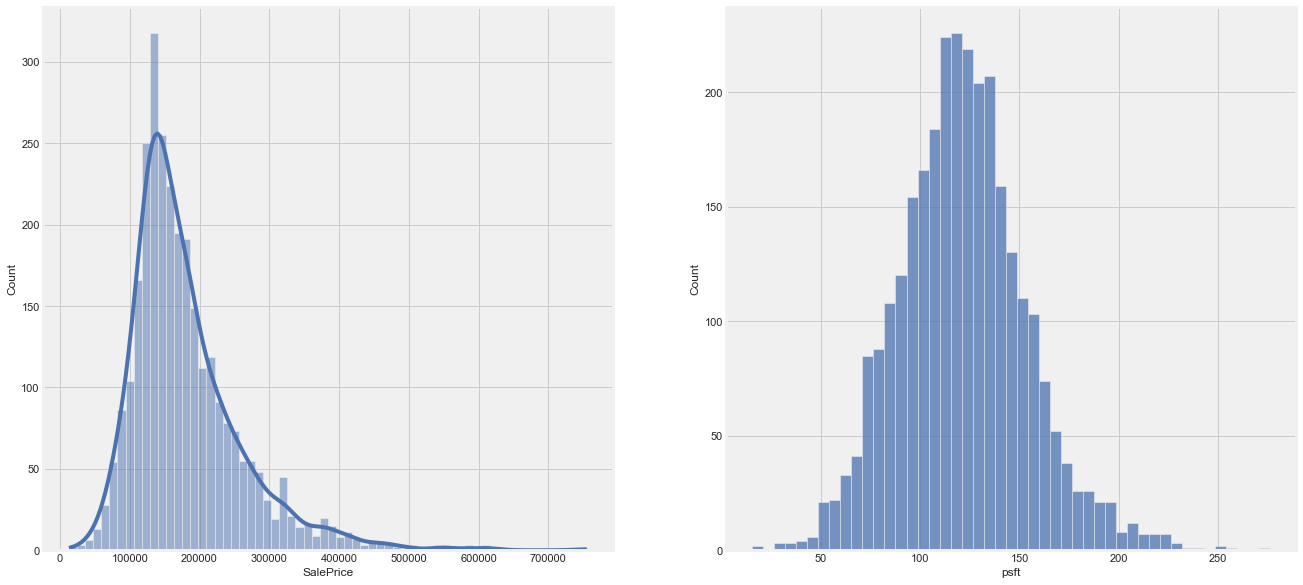

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(prices.SalePrice,kde=True, ax=axs[0])
sns.histplot(prices.psft, ax=axs[1,])

The mean SalePrice is 180,000 $. the cheapest sale was 12,789 and the most expensive 755,000. The inverted bell curve is not symetrical about the mean.  The Salesprice has a long right tail. Extremely expensive houses are to the right. 

The subplot on the right, PerSquare Feet prices is symetrical. Expensive houses are also very large. this we do not have a long right tail in the distribution. There is a big range in the per-squarefeet prices. 95% of the data falls between 50 - 225 $/sft. Size plays a role in determining price, but there are other variables also at play driving housing prices in AMES. 

Ames is a discrete dataset compiled over a 5 year duration. Each observation is independent from the next. We can agrregate observations over a period to obtain a sense the variation with time. We can look at the number of units sold and the monthly average Sales price. Agrregating converts the discrete Ames dataset into continous time dependent averages.

 In this case we are plotting the monthly average psft against the entire duration of observations from 2006 -2010. So we specify that our x-axis `x ='psft'` and yxis `y='date'` respectively. `sns.relplot` does the rest. We will find out more about the capabilities of `sns` as we go along.

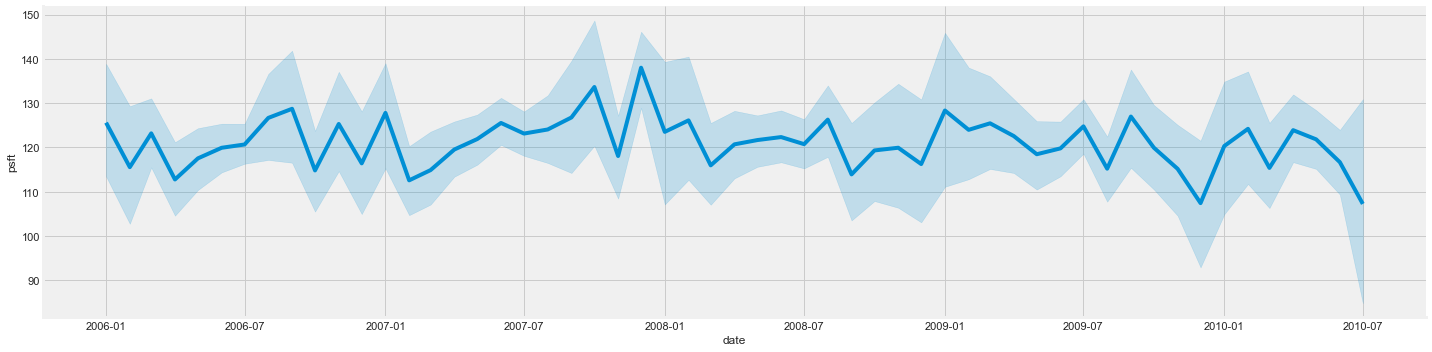

In [21]:
sns.relplot(x='date', y='psft', kind ='line', aspect = 4,data=prices)

The solid blue line represents the monthly average `psft`, while the light blue area shows the range of values. We can see that the average `psft` has been about 120$ across the years. The range has varied between +/- 20%. There are sharp fluctuations in the plot. This can arise from inherent market conditions. But , Fluctuations can also arise if the number of data points in a given period is small. An outlier, a very expensive house for instance, can push the average out. We should explore both these aspects. 

![Mortgage Rates](fredgraph.png)  
*Figure: Mortgage interest Rates : Source image downloaded from FRED*

First, lets explore market conditions. The mortgage interest rates in the same period has been constantly reducing. From about 6.5% at the start of 2006 the intrest rates have reduced to 4% in 2010. Lower intrest rates make the cost of owning a home cheaper. However the peak of either graphs graph do-not correspond. We can conclude low interest rates have not inflated the prices our the supply of housing.

> #### Pandas Datareader
> We had used an image from FRED to compare the intrest rates. But, importing data into pandas is easy. In this case we can do it with two lines of code using the library Pandas Datareader `pdr`. It has inbuilt methods to download data from various sources including FRED. it has a `get_data_fred()` method where, we have to specify the series we are interested in, and the time range
>```python
>>>mortgage = pdr.get_data_fred('MORTGAGE5US','2006-01-01','2010-07-01')
>```
>This creates a Pandas series object mortgage , the indices are date-stamps, the corresponding values are the intrest rate. This series has daily intrest rates. Our plot will have monthly average, hence we will average out this series to monthly using pandas `.resample()` method. Our resampling frequency is monthly `'M'`.  We chain up `.mean()` to obtain monthly averages.


In [22]:
import pandas_datareader as pdr
mortgage = pdr.get_data_fred('MORTGAGE5US','2006-01-01','2010-07-01')
mortgage = mortgage.resample('M').mean()
mortgage.head()

,MORTGAGE5US
DATE,
2006-01-31,5.7600
2006-02-28,5.9175
2006-03-31,5.9820
2006-04-30,6.1525
2006-05-31,6.2175


Next we should look at the demand for houses. Sales are cyclic in nature. Aggregating monthly sales and plotting  should expose seasonality in the data. Some of these houses are resale, while others are new. Seggregating can give us an insight into the market dynamics. 

The Sale_Type column is categorical. about 8% of all sales are classified as `New` in this column. We can query this column to filter out cases which are new. All other cases are resale. In this case we create a new column New based on the Sale_Type.

We `resample()` the dataframe to compute the monthly averages. Pandas has an aggregate method `.agg()`. It takes in a dictionary of column labels and associated aggregation methods.  so we can set
```python
>>prices.agg({'psft': ['mean', 'count'],
      'new': ['sum']})
```

Pandas then applies a monthly mean and sum for the psft column. While a summation for the boolean new column. This creates new columns `psft_mean`, `psft_count` and `new_sum` by combining the original column name and the method. We can then pass these labels to the plotting function.

> #### 📈 Seaborn
> Seaborn is a Pandas dataframe visualization library based on matplotlib. It provides a high-level interface for plotting. We can switch between higlevel themes. All the plots have a consistent visual presentation. Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Seaborn's strengths include its ability to handle pandas data structures and its ability to produce complex visualizations with just a few lines of code. It also has built-in themes for styling matplotlib graphics.
> We will be using Matplotlib to control basic functions. For instance we can setup the figure structure using matplotlib
>```python
>>>fig, ax = plt.subplots(3, 1, sharex=True, figsize= (20,10))
>```   
> This command creates a Figure having three subplots (3 rows x 1 column). The plots will share a common x-axis. The figure size for this has been set to 20 inches x 10 inches. This returns a figure object and an array for each of the three suplot. We can pass them inside seaborn methods.
>
> Seaborn has simple api to plot line, area, scatter and show the distribution of the data. It also has methods to render a collection of subplots into a figure. These methods take in a dataframe as data. The other attribuites are connected to columns in the dataframe. We will cover a few of them in this notebook.

<AxesSubplot:xlabel='DATE', ylabel='MORTGAGE5US'>

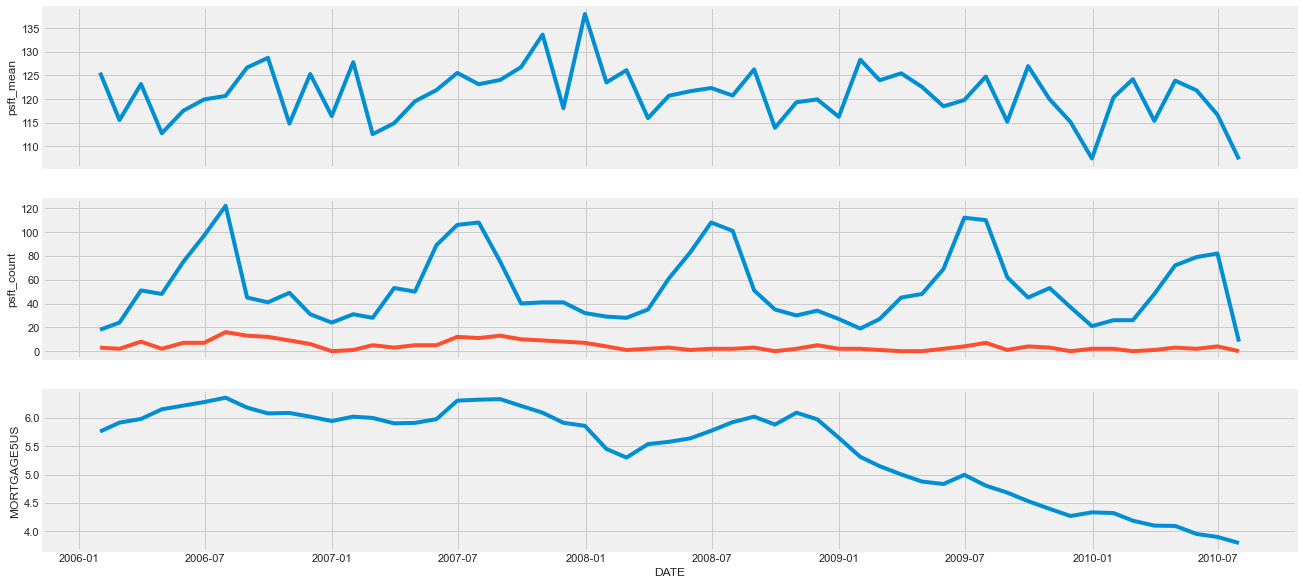

In [23]:

# Create the subplots
fig, ax = plt.subplots(3, 1, sharex=True, figsize= (20,10))



df = (prices
        .assign(
            # new = lambda x: x.Yr_Sold - x.Year_Built < 1,
            new  = lambda x: x.Sale_Type == 'New'
           )
        .filter(items =['date', 'psft','new'])
        .set_index('date')
        .resample('M')
        .agg({'psft': ['mean', 'count'],
                'new': ['sum']})
        #.reset_index()
    )
df.columns = ['_'.join(col).strip() for col in df.columns.values]
# Plot the data
sns.lineplot(x=df.index, y='psft_mean', data=df, ax=ax[0],)
sns.lineplot(x=df.index, y='psft_count', data=df, ax=ax[1])
sns.lineplot(x=df.index, y='new_sum', data=df, ax=ax[1])
sns.lineplot(x=mortgage.index, y='MORTGAGE5US', data=mortgage, ax=ax[2])


The number of houses sold (second plot) shows annual seasonality. There are 5 sets of peaks and valley corresponding to 5 years (2006-10). Peaks every year in June and bottoms out in January. The seasonality is present even for new constructed houses. Even though winter is not very harsh in Ames, people do not prefer to buy houses in christmas - New Year break. Houses are bought in the summer. 

New units account for about 10% of the all units sold. Mortagege rates have reduced but there has been no direct impact either on the demand or the supply of houses.

The lean months Nov - Mar have low sales hence they are succeptible to outliers. We can resample the the mean price using a yearly `'Y'` frequency. 

In [24]:
prices.set_index('date').psft.resample('Y').mean()

date
2006-12-31    120.289465
2007-12-31    123.552202
2008-12-31    121.005392
2009-12-31    120.927351
2010-12-31    119.845113
Freq: A-DEC, Name: psft, dtype: float64

Prices are stable when we resample with a yearly perspective. 

Apart from size, location of a home should impact its price.  We have a column `Neighbourhood` which groups sales by location. We can see how the psft changes with the neighbourhood. 

We will be using Saeborn's jointplot / jointgrid. Jointplot shows the distribution of two variables along with a histogram of both the variables along the axis. Lets check what it does:



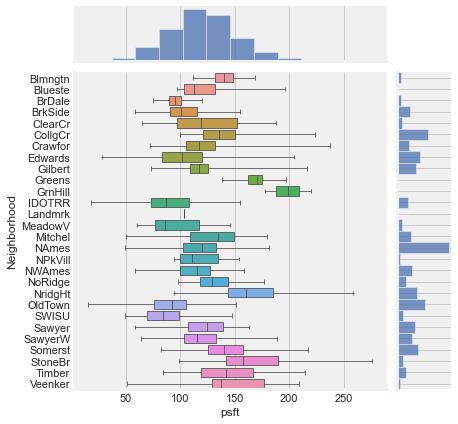

In [25]:
def joint_box_plot( df =prices,x_value = 'psft', y_value ='Mo_Sold', order=None,):
    g = sns.JointGrid(data =df, x=x_value, y = y_value, )
    g.plot_joint(sns.boxplot, linewidth=.75,whis=(0, 100), orient="h", order= order)
    g.plot_marginals(sns.histplot,bins=12)
    plt.show()
joint_box_plot(x_value = 'psft', y_value ='Neighborhood', df =prices)

We have a boxplot by neighbourhood. Value counts are shown as histogram plots along corresponding axis.
#### 📈 Boxplot
A boxplot shows the summary distribution of the data. There are boxplots corresponding to each neighbourhood. The plot against `Veenker`(at the bottom) shows two hairy whiskers spreading out from 50 -220. The whiskers show the range of values (min - max) within category. The pink box outline marks the quartile range. It shows the 25 percentile to 75 percentile value. The bar in the center shows the mean. The average value in `Veenker` is about 140 `psft`. The other boxplots show a distribution of their respective neighbourhood.

--- 
#### 📈 Joint Grid
Lets go through the code
```python
 >>g = sns.JointGrid(data =df, x=x_value, y = y_value, )
```
`sns.jointgrid` create a matplotlib scaffold wherein we can apply and finetune the remaining plot. We specify the dataframe and the relevant columns in this step
```python
 >>g.plot_joint(sns.boxplot, linewidth=.75,whis=(0, 100), orient="h", order= order)
```
The `plot_joint()` method is then called on the `JointGrid` object to create a box plot. The `linewidth` parameter is set to .75, and `whis` is set to (0, 100), which specifies the whiskers of the box plot to extend from the 0th to the 100th percentile of the data, effectively showing the full range of the data. The `orient` parameter is set to "h", which means the box plot is oriented horizontally. We will cover the order parameter in the next section.
```python
 >>g.plot_marginals(sns.histplot,bins=12)
```
The `plot_marginals()` method creates a histogram on the marginal axes. The `bins` is set to 12, which means any continous data will be divided into 12 bins for the histogram. In our case, `Neighbourhood` is categorical and the graph shows value_counts of each category label. `psft` is continous and it takes in `bins=12` we had passed in as argument in our function call.

Finally, `plt.show()` is called to display the plot. *This is a function from the matplotlib library, which seaborn is built on top of*.

---
#### Pandas Groupby
We would want to show the box plots ordered by the mean `psft`. Currently they are but jumbled together. We have designed a parameter order as an input to the function. This is then passed to the `plot_joint()` method.`order` takes in a list of category labels and orders the box plot in the same sequence. We can construct the ordered lists using the `groupby()` function in Pandas. Lets take the code below:

In [26]:
order =( prices
             .groupby('Neighborhood')
             .aggregate({'psft':'mean'})
             .sort_values('psft')
             .index
             .tolist()
        )
order

['SWISU',
 'IDOTRR',
 'OldTown',
 'MeadowV',
 'BrDale',
 'Edwards',
 'BrkSide',
 'Landmrk',
 'NWAmes',
 'NAmes',
 'NPkVill',
 'SawyerW',
 'Gilbert',
 'Sawyer',
 'Crawfor',
 'ClearCr',
 'Blueste',
 'Mitchel',
 'NoRidge',
 'CollgCr',
 'Blmngtn',
 'Veenker',
 'Somerst',
 'Timber',
 'NridgHt',
 'StoneBr',
 'Greens',
 'GrnHill']

Lets break down the chain rule we have executed above:

1. `prices.groupby('Neighborhood')`: This groups the `prices` DataFrame by the 'Neighborhood' column. Each group corresponds to a different neighborhood.

2. `.aggregate({'psft':'mean'})`: This applies the `mean` function to the 'psft' column within each group. The result is a new DataFrame where the index is the unique neighborhoods and the 'psft' column contains the mean price per square foot for each neighborhood.

3. `.sort_values('psft')`: This sorts the DataFrame by the 'psft' column in ascending order. The neighborhoods with the lowest mean price per square foot come first.

4. `.index`: This gets the index of the DataFrame, which is the list of neighborhoods.

5. `.tolist()`: This converts the index, which is a pandas Index object, to a regular Python list.

The result is stored in the variable `order`. and we can now pass it inot the plot function to get:

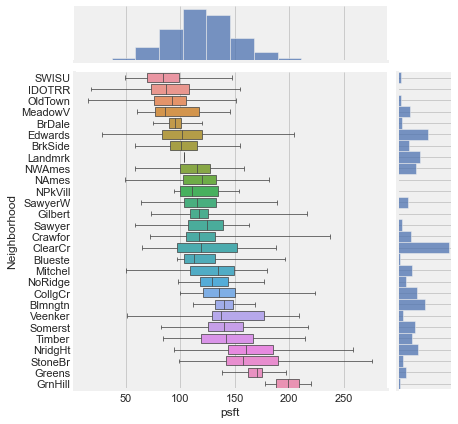

In [27]:
joint_box_plot(x_value = 'psft', y_value ='Neighborhood', 
               df =prices, order=order)

The most expensive neighbourhood is about 2 times the psft of the cheapest. We also see a huge variation in the number of units sold. ClearCr (in the middle) has the most units sold.

It will be intresting to see how these neighbourhoods compare with repect to Age of the dwellings. Which are the old-towns and which are the new-subburbs. We can easily change the parameter of the function call to get:

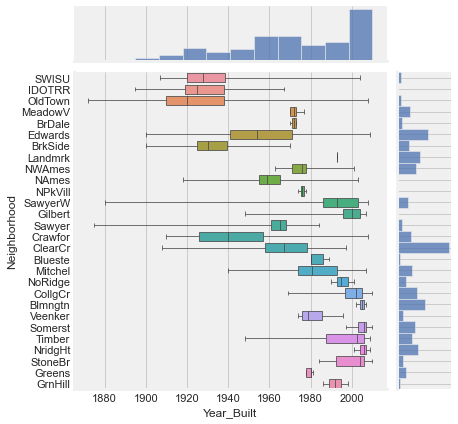

In [28]:
joint_box_plot(x_value = 'Year_Built', y_value ='Neighborhood', 
               df =prices, order=order)

Expensive neighbourhood have newer houses on the market. The top 33% have houses age under 40 years. Cheaper neighbourhood have primarily older houses on market. Bottom 33% has a median age over 50 years.

AMES includes a column `'Bldg_Type'` classifying units as Townhouses, Duplex, Single Family houses and so on. Townhouses share the land amongst residents, while a single family house has the deed for the land as well (in most cases). It is natural that each of these building type will have a different scale for valuation. We can check how these units compare (`Year_Built`, `psft`). Change the xparam in the cell below to find out:


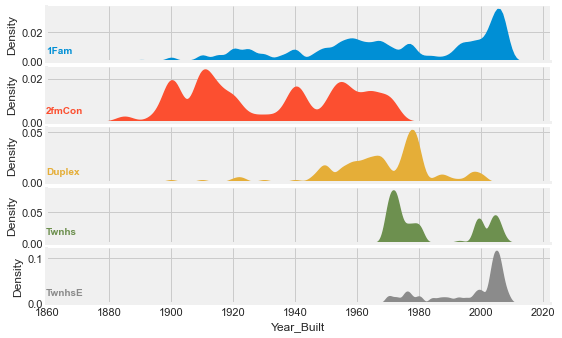

In [29]:
ycategory = "Bldg_Type"
xparam = "Year_Built"
g = sns.FacetGrid(data =prices, row=ycategory, hue=ycategory, 
                  sharex=True,sharey=False,
                  aspect=8, height=1,)

# Draw the densities in a few steps
#g.map(sns.histplot, "Year_Built", bins =40)
g.map(sns.kdeplot, xparam,
      bw_adjust=.25, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# Define and use a simple function to label the plot in axes coordinates
def labelfn(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(labelfn, xparam)

# FORMATTING
# Remove axes details that don't play well with overlap
g.figure.subplots_adjust(hspace=.1)
g.set_titles("")
#g.set(yticks=[], ylabel="")

KDEplot show the density. The value at a given year on the plot shows the proportion of the houses (density) that were built in the given year. It  is related to the histogram plots that we have seen. The histogram values have been smoothed. The y-axis doenot show the value count rather the proportion. Across the subplots the value-counts will vary.  1Fam are the most common type of building, however the subplots do not emphasize this difference iacross subplots. Rather we have the difference in distribution across time.

1Fam unit are the oldest units ever sold. `2FamCon` 2 Family converted units from single Family units started as a `1Fam`. Based on the dataset Townhouses (Twnhs : Townhouse inside unit, TwnhsE:Townhouse end unit ) appear to have been built since 1970. Perhaps there had been a legislative change which allowed these units to be built in the first place. Not many duplex units have been built since 1980. 

--- 

#### 📈 Facet Grid

Lets go through the code
The FacetGrid class allows us to visualuze relationships across categories. In this case we have set the rows as the category `Bldg_Type`. It created 5 subplots corresposnding to all the categorsies in `Bldg_Typ`. Facetgrid also accepts categories as columns. The FacetGrid is initialized with `sns.FacetGrid()`. The `data` parameter is set to `prices`. The `sharex` parameter is set to True, which implies all subplots of the grid will share the x-axis. We donot have multiple axis for each individual subplot. After initializing it return the Facetgrid Class which can then be coustomized to our needs.

We use `g.map()` customize the sublopt in the grid. `g.map()` takes in the poltting function and its associated paraeters. We are using the KDEplot on each individual level of the grid. The `bw_adjust` parameter is set to 0.25, which controls the smoothness of the density estimate. The `clip_on` parameter is set to True, which means the density estimate is clipped to the plot area. The `fill` parameter is set to True, which means the area under the density curve is filled. The `alpha` parameter is set to 1, which controls the transparency of the fill, and `linewidth` is set to 1.5, which controls the width of the line that outlines the density estimate.

We have shown the legend on the left hand side of each plot. This is a customization. We have implemented a function `labelfn` for the same. This function is then mapped to each facet of the grid using `g.map()`.

Finally, some formatting is applied to the plot. The `subplots_adjust()` function is used to adjust the space between the subplots. the plots are continous. The `set_titles()` function is used to remove the titles from each subplot, and the `set()` function is used to remove the y-axis ticks and label.

In [30]:
prices.Bldg_Type.value_counts()

1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg_Type, dtype: int64

Most houses in Ames are 1Fam units. You will come across a Townhouse (`Twnhs`, `TwnhsE`) occasionaly. 

Lets Explore single Family units `1Fam`. Plotting how the `psft` varies with the `Year_Built`. We will also check how the different styles of house 1-storey , 2-storey have influenced prices.

> #### Pandas Querying
>In pandas we can filter the datset based on a querry such that if we write down
>```python
>>> prices.query("Bldg_Type == '1Fam' ")
>```
>It returns only those rows that are single family units. Pandas querries can be combined using `and` `or` keywords. For numerical columns we can use greater than and lesser than as well. So this query gives
>```python
>>> prices.query("Bldg_Type == '1Fam'  and SalePrice > 100000")
>```
>Gives all single family homes that have been sold over 100,000.


<AxesSubplot:xlabel='Year_Built', ylabel='psft'>

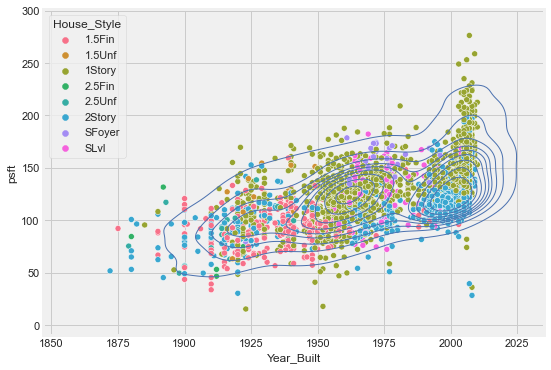

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=prices.query("Bldg_Type == '1Fam' "), 
            y ="psft", x='Year_Built', levels=10, 
             color="b", linewidths=1)
sns.scatterplot(data=prices.query("Bldg_Type == '1Fam' "), 
                y ="psft", x = "Year_Built", hue="House_Style", )


In the 1960's single family homes houses built were mostly single story *the green dots*. Refer to the legend plotted on the top left.With time cost has gone up. The green dots have moved up the psft axis. New single family homes are primarily 2 storey. 1 storey homes are more expensive. For the same lot area you can get a bigger home with a 2 storey compared to a single storey. In the figure the blue dots (2storey) have replaced the green dots (1storey). The plot also suggests in the period 1980-90 not many single family homes have been constructed.

The Kde plots shows the density in a given region. The plot lines connect region having the same density *(frequency)*. KDE plot show structures within the data. 1950 and 2000 are two periods when a lot of houses got built. And we see those peaks in the KDE plot.

---

Lets go through the code. `plt.subplots(figsize=(8, 6))` is used to create a new figure using Matplotlib `plt`. The `figsize` parameter is set to `(8, 6)`, which specifies the width and height of the figure in inches. Size is important if you want to save the figure as a `.png` file later on using code.

#### 📈 Scatter Plot
A scatter plot, shows each individual observation with respect to two (or three) variables. In this code block we have rendered a KDEplot and overlayed on top of it a scatterplot. 

In the second line, `sns.scatterplot()` is used to create a scatterplot. The `data` parameter is set to `prices.query("Bldg_Type == '1Fam' ")`, which means the data for the scatterplot is taken from the `prices` DataFrame, but only rows where the `Bldg_Type` is `'1Fam'` are included. The `y` parameter is set to `"psft"`, and the `x` parameter is set to `"Year_Built"`, which means the scatterplot will show the relationship between the year a building was built and its price per square foot. The `hue` parameter is set to `"House_Style"`, which means the points in the scatterplot will be colored based on the house style.

#### 📈 KDE Plot
In the third line, `sns.kdeplot()` is used to create a KDE plot on the same axes. The `data`, `y`, and `x` parameters are set in the same way as for the scatterplot. The `levels` parameter is set to `7`, which controls the number of contour levels in the KDE plot. The `color` parameter is set to `"b"`, which means the contours will be blue. The `linewidths` parameter is set to `1`, which controls the width of the contour lines.

Overall, this code is creating a scatterplot and a KDE plot on the same axes to visualize the relationship between the year a building was built and its price per square foot, for buildings of type `'1Fam'`, with points and contours colored based on the house style.

---

We might as well take a look the interaction between several variables. For instance over time how has the size of single family home have varied. How do sale price and lot are relate. Which parameter has a stornger correlation to the Saleprice the builtup Area `Gr_Liv_Area` or the lot area `Lot_Area`. 

Seaborn's `PairPlot` helps us to look at mutiple parameetrs and quickly make an inference. Just like the FacetGrid a pair plot has a set of sublots arranged into row and columns. But in Pairplots the rows and columns in the plot have the same culmn labels. A subplot on the figure shows the distribution between variables at a given row and column. 

Lets take the example below:

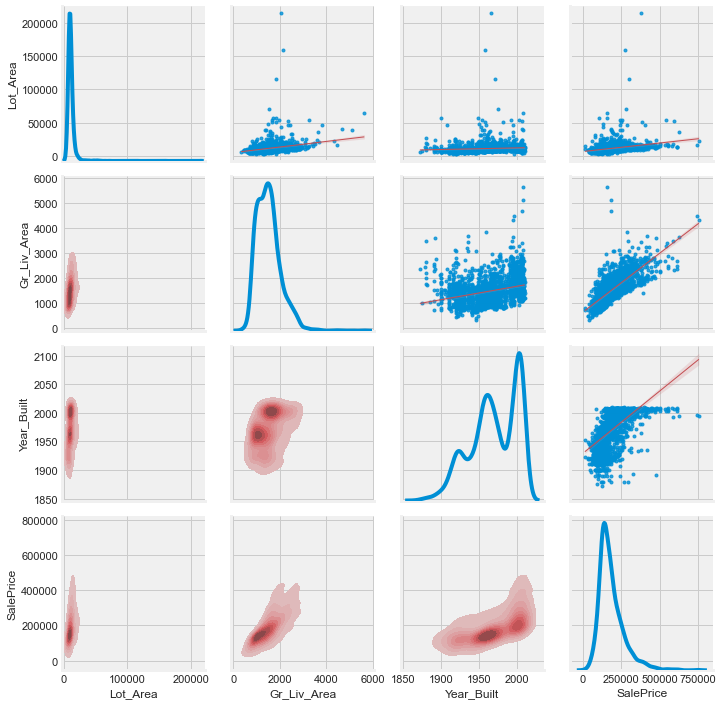

In [32]:
#columns = ['Lot_Area','Gr_Liv_Area','Total_Bsmt_SF','Garage_Area','Year_Built','SalePrice','Bldg_Type']
columns = ['Lot_Area','Gr_Liv_Area','Year_Built','SalePrice','Bldg_Type']
g =  sns.PairGrid( (prices
                        .filter(items = columns)
                        .query("Bldg_Type == '1Fam' ")
                    ),diag_sharey=False, 
            )
g.map_lower(sns.kdeplot, levels=10, color="r", fill=True)
g.map_upper(sns.regplot, marker ='.',line_kws=dict(color="r", linewidth=1))
g.map_diag(sns.kdeplot,)

The histogram of the `Year_Built` (3rd row on the diaginal) shows three sharp peak. There is a sharp dip in the 1930 and in 1980. The great depression of 40's and the Oil price shock of the 80's. It would be intresting to relate building booms with the Mortage interest rates we obtained from Pandas Datareader. You could easily modify the code and make that comparision. 

Except for `Lot_Area` - `Year_Built` which appears constant, All correlations within the graph (above the diagonal) show an increasing pattern. The strong red line in those graph shows the best fit line estimating the relationship based on the data (blue scatter dots). The light red shade shows the uncertainity. WWe will cover best-fit and uncertainity in a later excercise.

The plots below the diaginal show the KDE. The `Lot_Area` has a short span, and we see its impact on the KDE plots in the first column. `Gr_Liv_Area` and `SalePrice` have a bigger spread. `Year_Built` has three peaks and we can see those distributions in the KDE plot as well.

---

Lets take the code.  The `sns.PairGrid` function is used to create the grid of subplots. Its arguments is similar to the JointGrid which we have seen previously.  The `diag_sharey` parameter is set to False, which means that the y-axes of the diagonal subplots are not shared with the other subplots. This can be useful when the diagonal subplots have a different scale than the off-diagonal subplots.

The `map_lower`, `map_upper`, and `map_diag` methods are then called on the PairGrid object to specify what kind of plot should be created in the lower triangle, upper triangle, and diagonal of the grid, respectively.

The `map_lower` method creates a kernel density estimate (kde) plot in the lower triangle of the grid. The `levels` parameter is set to 10, which specifies the number of contour levels in the kde plot. We have set `fill = True`. This fills the resulting contour gradients. I find the graph is more legible if we fill it up.

The `map_upper` method creates a regression plot in the upper triangle of the grid. The `marker` parameter is set to '.', which means the data points will be represented as dots. The `line_kws` parameter is used to specify properties of the regression line, in this case setting its color to red.

The `map_diag` method creates a kde plot on the diagonal of the grid. This plot shows the distribution of each variable.

___




#### Epilogue
We have seen several parameters have changed with time. Townhouses have a clearly defined start in the AMES timeline. The regression plots against time `Year_Built` shows that on an average the size of homes have grown albeit grafually. The lot size in single family units have remained largely static. From the scatterplot in the previous codeblock we have seen that we are building more 2 story houses. Constant lot size, with a bigger livable square feet `Gr_Liv_Area` neccisitates contractory to go verticallly up. It would be interseting to observe how the number of rooms in a unit, pool area and other such preferences have changed with time. We can modify our facetgrid plot to show a list of kedplots angainst `Year_Built`.

There are other corellation that might intrest us. How does the size / cost of the home inflence amenities. At what price point / size is it likely that a 1Fam unit will have a pool. What is the average price of a home in different neighbourhood? These are but querries into the dataset, filtering the information by a column. In some cases you might have to group and aggregate the results. Pull out the codeblock and see if you can find out these insights.


---

